In [2]:
from collections import Counter, defaultdict
from gensim.models import Word2Vec
from IPython import display
from nltk import word_tokenize
from nltk.translate.bleu_score import sentence_bleu
from PIL import Image
from torch import nn
from torch.autograd import Variable
from torchvision import models, transforms

import json
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import random
import torch
import torch.nn.functional as F

In [3]:
use_cuda = True

In [4]:
# Load annotations file for the training images.

mf_train = json.load(open('metadata.json'))

train_ids = []  
# Iterating through the json
# list
for i in mf_train['train']['mitotic']:
    train_ids.append(i) #mf_train['train']['mitotic']

test_ids = []

for i in mf_train['test']['mitotic']:
    test_ids.append(i)

    
train_ann = []

for i in mf_train['train']['mitotic']:
    train_ann = mf_train['train']['mitotic']

    
tr_ann = []

for i in range(len(train_ids)):
    tr_ann.append(train_ann.get(train_ids[i]))   
    
    
test_ann = []

for i in mf_train['test']['mitotic']:
    test_ann = mf_train['test']['mitotic']

tst_ann = []

for i in range(len(test_ids)):
    tst_ann.append(test_ann.get(test_ids[i]))   

In [21]:
train_ann

{'8739.jpg': 'Mitotic figure at metaphase',
 '5314.jpg': 'Mitotic figure undergoing cytokinesis',
 '16105.jpg': 'Mitotic figure undergoing mitosis',
 '16525.jpg': 'Round mitotic figure with a single nucleus',
 '11038.jpg': 'Mitotic figure at anaphase',
 '229927.jpg': 'Round mitotic figure with multiple nuclei',
 '801.jpg': 'Mitotic figure at metaphase',
 '15641.jpg': 'Oblong mitotic figure with a single nucleus',
 '1085.jpg': 'Square mitotic figure with multiple nuclei',
 '16688.jpg': 'Mitotic figure undergoing mitosis',
 '21320.jpg': 'Round mitotic figure with a single nucleus',
 '17505.jpg': 'Mitotic figure undergoing cytokinesis',
 '4376.jpg': 'Mitotic figure at anaphase',
 '32907.jpg': 'Oblong mitotic figure with a single nucleus',
 '14323.jpg': 'Mitotic figure at metaphase',
 '16740.jpg': 'Round mitotic figure with multiple nuclei',
 '8226.jpg': 'Mitotic figure undergoing mitosis',
 '5404.jpg': 'Round mitotic figure with a single nucleus',
 '24512.jpg': 'Square mitotic figure with

In [4]:
tr_ann = []
for i in range(len(train_ids)):
    tr_ann.append(train_ann.get(train_ids[i]))

In [69]:
len(tr_ann)

10694

In [5]:
sentences = tr_ann#[sentence for caption_set in train_id_to_captions.values() for sentence in caption_set]

# Lower-case the sentence, tokenize them and add <SOS> and <EOS> tokens
sentences = [["<SOS>"] + word_tokenize(sentence.lower()) + ["<EOS>"] for sentence in sentences]

# Create the vocabulary. Note that we add an <UNK> token to represent words not in our vocabulary.
vocabularySize = 20
word_counts = Counter([word for sentence in sentences for word in sentence])
vocabulary = ["<UNK>"] + [e[0] for e in word_counts.most_common(vocabularySize-1)]
word2index = {word:index for index,word in enumerate(vocabulary)}
one_hot_embeddings = np.eye(vocabularySize)

# Define the max sequence length to be the longest sentence in the training data. 
maxSequenceLength = max([len(sentence) for sentence in sentences])


In [72]:
word_counts

Counter({'<SOS>': 10694,
         'mitotic': 10694,
         'figure': 10694,
         'at': 2102,
         'metaphase': 1067,
         '<EOS>': 10694,
         'undergoing': 2181,
         'cytokinesis': 1113,
         'mitosis': 1068,
         'round': 2115,
         'with': 6411,
         'a': 3209,
         'single': 3209,
         'nucleus': 3209,
         'anaphase': 1035,
         'multiple': 3202,
         'nuclei': 3202,
         'oblong': 2140,
         'square': 2156})

In [128]:
one_hot_embeddings

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.

In [129]:
preprocess_one_hot(sentence)

[1, 0, 4]
[1, 0, 4]


array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]])

In [6]:
def preprocess_numberize(sentence):
    """
    Given a sentence, in the form of a string, this function will preprocess it
    into list of numbers (denoting the index into the vocabulary).
    """
    tokenized = word_tokenize(sentence.lower())
    #print(tokenized)    
    # Add the <SOS>/<EOS> tokens and numberize (all unknown words are represented as <UNK>).
    tokenized = ["<SOS>"] + tokenized + ["<EOS>"]
    numberized = [word2index.get(word, 0) for word in tokenized]
    
    #print(numberized)
    
    return numberized

def preprocess_one_hot(sentence):
    """
    Given a sentence, in the form of a string, this function will preprocess it
    into a numpy array of one-hot vectors.
    """
    numberized = preprocess_numberize(sentence)
    
    #print(numberized)
    
    # Represent each word as it's one-hot embedding
    one_hot_embedded = one_hot_embeddings[numberized]
    
    return one_hot_embedded

In [58]:
tr_ann

['Mitotic figure at metaphase',
 'Mitotic figure undergoing cytokinesis',
 'Mitotic figure undergoing mitosis',
 'Round mitotic figure with a single nucleus',
 'Mitotic figure at anaphase',
 'Round mitotic figure with multiple nuclei',
 'Mitotic figure at metaphase',
 'Oblong mitotic figure with a single nucleus',
 'Square mitotic figure with multiple nuclei',
 'Mitotic figure undergoing mitosis',
 'Round mitotic figure with a single nucleus',
 'Mitotic figure undergoing cytokinesis',
 'Mitotic figure at anaphase',
 'Oblong mitotic figure with a single nucleus',
 'Mitotic figure at metaphase',
 'Round mitotic figure with multiple nuclei',
 'Mitotic figure undergoing mitosis',
 'Round mitotic figure with a single nucleus',
 'Square mitotic figure with multiple nuclei',
 'Mitotic figure at metaphase',
 'Mitotic figure undergoing cytokinesis',
 'Oblong mitotic figure with a single nucleus',
 'Mitotic figure at metaphase',
 'Mitotic figure undergoing mitosis',
 'Mitotic figure undergoing m

In [7]:
# Define a global transformer to appropriately scale images and subsequently convert them to a Tensor.
img_size = 224
loader = transforms.Compose([
  transforms.Resize(img_size),
  transforms.CenterCrop(img_size),
  transforms.ToTensor(),
]) 
def load_image(filename, volatile=False):
    """
    Simple function to load and preprocess the image.

    1. Open the image.
    2. Scale/crop it and convert it to a float tensor.
    3. Convert it to a variable (all inputs to PyTorch models must be variables).
    4. Add another dimension to the start of the Tensor (b/c VGG expects a batch).
    5. Move the variable onto the GPU.
    """
    image = Image.open(filename).convert('RGB')
    image_tensor = loader(image).float()
    image_var = Variable(image_tensor, volatile=volatile).unsqueeze(0)
    return image_var.cuda()

In [8]:
import torch
import torch.nn.functional as F
import torch.nn as nn

from PIL import Image

import os
import json
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
#from GPUtil import showUtilization as gpu_usage

import torchvision
from torchvision import models
from torchvision import transforms
from torchvision.models import resnet50
import torchvision.models as models

file_path='../model_dev/vgg16_ft.pth'

model = models.vgg16(pretrained=False)

#torch.save(vgg16_ft.state_dict(), 'vgg16_ft.pth')

num_features = model.classifier[6].in_features
features = list(model.classifier.children())[:-1]
features.extend([nn.Linear(num_features, 2)])
model.classifier = nn.Sequential(*features)

#model = torch.load(file_path)
model.load_state_dict(torch.load(file_path))
#model.eval()

num_features = model.classifier[6]#.in_features
features = list(model.classifier.children())[:-1]
#features.extend([nn.Linear(num_features, 5)])
newmodel = model
newmodel.classifier = nn.Sequential(*features)

num_features = newmodel.classifier[5]#.in_features
features = list(newmodel.classifier.children())[:-1]
#features.extend([nn.Linear(num_features, 5)])
newmodel = newmodel
newmodel.classifier = nn.Sequential(*features)

num_features = model.classifier[4]#.in_features
features = list(model.classifier.children())[:-1]
#features.extend([nn.Linear(num_features, 5)])
newmodel = newmodel
newmodel.classifier = nn.Sequential(*features)

newmodel.eval()

/home/jmwolf/anaconda3/envs/wsi_eda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/home/jmwolf/anaconda3/envs/wsi_eda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [23]:
class ImageEncoder(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(ImageEncoder, self).__init__()
        self.out = nn.Linear(input_size, hidden_size)
        
    def forward(self, inputs):
        return self.out(inputs)
    
class DecoderLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(DecoderLSTM, self).__init__()
        self.hidden_size = hidden_size

        self.lstm = nn.LSTM(input_size, hidden_size)
        self.out = nn.Linear(hidden_size, output_size)

    def forward(self, input, hidden):
        output = F.relu(input)
        output, hidden = self.lstm(output, hidden)
        output = self.out(output)
        output = F.log_softmax(output.squeeze(), dim=0)
        return output.unsqueeze(0), hidden
    
encoder = ImageEncoder(input_size=4096, hidden_size=300).cuda()
decoder = DecoderLSTM(input_size=len(vocabulary), hidden_size=300, output_size=len(vocabulary)).cuda()

In [10]:
encoder

ImageEncoder(
  (out): Linear(in_features=4096, out_features=300, bias=True)
)

In [11]:
decoder

DecoderLSTM(
  (lstm): LSTM(20, 300)
  (out): Linear(in_features=300, out_features=20, bias=True)
)

In [12]:
# The next two functions are part of some other deep learning frameworks, but PyTorch
# has not yet implemented them. We can find some commonly-used open source worked arounds
# after searching around a bit: https://gist.github.com/jihunchoi/f1434a77df9db1bb337417854b398df1.
def _sequence_mask(sequence_length, max_len=None):
    if max_len is None:
        max_len = sequence_length.data.max()
    batch_size = sequence_length.size(0)
    seq_range = torch.arange(0, max_len).long()
    seq_range_expand = seq_range.unsqueeze(0).expand(batch_size, max_len)
    seq_range_expand = Variable(seq_range_expand)
    if sequence_length.is_cuda:
        seq_range_expand = seq_range_expand.cuda()
    seq_length_expand = (sequence_length.unsqueeze(1)
                         .expand_as(seq_range_expand))
    return seq_range_expand < seq_length_expand


def compute_loss(logits, target, length):
    """
    Args:
        logits: A Variable containing a FloatTensor of size
            (batch, max_len, num_classes) which contains the
            unnormalized probability for each class.
        target: A Variable containing a LongTensor of size
            (batch, max_len) which contains the index of the true
            class for each corresponding step.
        length: A Variable containing a LongTensor of size (batch,)
            which contains the length of each data in a batch.

    Returns:
        loss: An average loss value masked by the length.
    """
    # logits_flat: (batch * max_len, num_classes)
    logits_flat = logits.view(-1, logits.size(-1))
    # log_probs_flat: (batch * max_len, num_classes)
    log_probs_flat = logits_flat
    # target_flat: (batch * max_len, 1)
    target_flat = target.view(-1, 1)
    # losses_flat: (batch * max_len, 1)
    losses_flat = -torch.gather(log_probs_flat, dim=1, index=target_flat)
    # losses: (batch, max_len)
    losses = losses_flat.view(*target.size())
    # mask: (batch, max_len)
    mask = _sequence_mask(sequence_length=length, max_len=target.size(1))
    losses = losses * mask.float()
    loss = losses.sum() / length.float().sum()
    return loss

In [38]:
all_decoder_outputs = Variable(torch.zeros(*embed_caption.size()))
all_decoder_outputs.shape

torch.Size([3, 100, 20])

In [13]:
def train(input_variables,
          embed_caption, 
          target_caption,
          input_lens,
          encoder, 
          decoder, 
          encoder_optimizer, 
          decoder_optimizer, 
          criterion, 
          embeddings=one_hot_embeddings):
    encoder_optimizer.zero_grad()
    decoder_optimizer.zero_grad()

    # Pass the image through the encoder
    encoder_output = encoder(input_variables).unsqueeze(0)
    
    # Construct the decoder input (initially <SOS> for every batch)
    decoder_input = Variable(torch.FloatTensor([[embeddings[word2index["<SOS>"]]
                                                for i in range(embed_caption.size(1))]]))

    
    decoder_input = decoder_input.cuda() if use_cuda else decoder_input

    # Set the initial hidden state of the decoder to be the output of the encoder
    decoder_hidden = (encoder_output, encoder_output)

    # Prepare the results tensor
    all_decoder_outputs = Variable(torch.zeros(*embed_caption.size()))
    if use_cuda:
        all_decoder_outputs = all_decoder_outputs.cuda()
        
    all_decoder_outputs[0] = decoder_input
        
    # Iterate over the indices after the first.
    for t in range(1,embed_caption.size(0)):
        decoder_output, decoder_hidden = decoder(decoder_input, decoder_hidden)
    
        if random.random() <= 0.8:
            decoder_input = embed_caption[t].unsqueeze(0)
        else:
            topv, topi = decoder_output.data.topk(1)
                       
            #Prepare the inputs
            decoder_input = torch.stack([Variable(torch.FloatTensor(embeddings[ni])).cuda()
                                         for ni in topi.squeeze()]).unsqueeze(0)
        
        # Save the decoder output
        all_decoder_outputs[t] = decoder_output
        
    loss = compute_loss(all_decoder_outputs.transpose(0,1).contiguous(),
                        target_caption.transpose(0,1).contiguous(), 
                        Variable(torch.LongTensor(input_lens)).cuda())

    loss.backward()
    
    torch.nn.utils.clip_grad_norm(encoder.parameters(), 10.0)
    torch.nn.utils.clip_grad_norm(decoder.parameters(), 10.0)

    encoder_optimizer.step()
    decoder_optimizer.step()

    return loss.data#[0]

In [14]:
def pad_seq(arr, length, pad_token):
    """
    Pad an array to a length with a token.
    """
    if len(arr) == length:
        return np.array(arr)
    
    return np.concatenate((arr, [pad_token]*(length - len(arr))))

In [15]:
encoder_optimizer = torch.optim.Adam(decoder.parameters(), lr=0.01) 
decoder_optimizer = torch.optim.Adam(decoder.parameters(), lr=0.01) 
criterion = nn.CrossEntropyLoss()

In [16]:
train_ids[0]

'8739.jpg'

In [166]:
path = '../model_dev/Data_CMC_COADEL_224_1/train/Mitosis/'
training_vectors = []
for i in range(len(train_ids)):
    # Load/preprocess the image.
    img = load_image(path + train_ids[i])
    
    newmodel.cuda()
    # Run through the convolutional layers and resize the output.
    output = newmodel(img)
    
    output.cpu()
    
    training_vectors.append(np.array(list(output.data.squeeze().cpu())))

# For simplicity, we convert this to a numpy array and save the result to a file.
training_vectors = np.stack(training_vectors, axis=0)
np.save(open('training_vectors.npy', 'wb+'), training_vectors)

In [165]:
training_vectors

array([[ 0.02165731, -0.19221051, -0.04879555, ..., -0.10588859,
        -0.0091772 , -0.07338897],
       [-0.0208411 , -0.21196876, -0.06490016, ..., -0.20515403,
        -0.10569627, -0.1469276 ],
       [ 0.0494277 , -0.15999722, -0.0424732 , ..., -0.03544305,
        -0.08873826, -0.07192547],
       ...,
       [-0.03374022, -0.04010822, -0.03163221, ..., -0.10473065,
        -0.00503679,  0.02757923],
       [-0.06289111, -0.04299765,  0.03350599, ..., -0.02851035,
        -0.08638814, -0.0089609 ],
       [-0.01786936, -0.12081027, -0.06458603, ..., -0.06972426,
        -0.01805897, -0.10951037]], dtype=float32)

In [18]:
path = '../model_dev/Data_CMC_COADEL_224_1/val/Mitosis/'
# Next we vectorize all of the validation images and write the results to a file.
validation_vectors = []
for i in range(len(test_ids)):
    # Load/preprocess the image.
    img = load_image(path + test_ids[i])

    newmodel.cuda()
    # Run through the convolutional layers and resize the output.
    output = newmodel(img)
    
    output.cpu()

    validation_vectors.append(np.array(list(output.data.squeeze().cpu())))

# For simplicity, we convert this to a numpy array and save the result to a file.
validation_vectors = np.stack(validation_vectors, axis=0)
np.save(open('validation_vectors', 'wb+'), validation_vectors)

In [24]:
# Load in the vectors and print their sizes
training_vectors = np.load(open('training_vectors.npy', 'rb'))
validation_vectors = np.load(open('validation_vectors', 'rb'))

print(training_vectors.shape)
print(validation_vectors.shape)

train_id_to_vector = {}
for i, train_id in enumerate(train_ids):#[:20]):
    train_id_to_vector[train_id] = training_vectors[i]

(10694, 4096)
(3460, 4096)


In [168]:
training_vectors

array([[ 0.02165731, -0.19221051, -0.04879555, ..., -0.10588859,
        -0.0091772 , -0.07338897],
       [-0.0208411 , -0.21196876, -0.06490016, ..., -0.20515403,
        -0.10569627, -0.1469276 ],
       [ 0.0494277 , -0.15999722, -0.0424732 , ..., -0.03544305,
        -0.08873826, -0.07192547],
       ...,
       [-0.03374022, -0.04010822, -0.03163221, ..., -0.10473065,
        -0.00503679,  0.02757923],
       [-0.06289111, -0.04299765,  0.03350599, ..., -0.02851035,
        -0.08638814, -0.0089609 ],
       [-0.01786936, -0.12081027, -0.06458603, ..., -0.06972426,
        -0.01805897, -0.10951037]], dtype=float32)

In [71]:
len(vocabulary)

20

In [30]:
def pad_seq(arr, length, pad_token):
    """
    Pad an array to a length with a token.
    """
    if len(arr) == length:
        return np.array(arr)
    
    return np.concatenate((arr, [pad_token]*(length - len(arr))))

encoder_optimizer = torch.optim.Adam(decoder.parameters(), lr=0.01) 
decoder_optimizer = torch.optim.Adam(decoder.parameters(), lr=0.01) 
criterion = nn.CrossEntropyLoss()  

# Formulate the training data
train_data = [(train_id,caption) for train_id,captions in train_ann.items() 
              for caption in captions if len(caption) > 0]
random.shuffle(train_data)

num_epochs = 10
batch_size = 100
for _ in range(num_epochs):
    for i in range(len(train_data)//batch_size):
        # Get the data in the batch
        batch = train_data[i*batch_size:(i+1)*batch_size]
        
        # Get all of the image vectors
        input_variable = np.stack([train_id_to_vector[train_id] for train_id,_ in batch])
        input_variable = Variable(torch.FloatTensor(input_variable)).cuda()
        #print(input_variable.shape)
        # Get the sentences
        sentences = [sentence for _,sentence in batch]
        
        # Get the sentence lengths
        sentence_lens = [len(preprocess_numberize(sentence)) for sentence in sentences]
                
        # Determine length to pad everything to
        max_len = max(sentence_lens)
        
        # Preprocess all of the sentences in each batch
        one_hot_embedded_list = [preprocess_one_hot(sentence) for sentence in sentences]
        #print(len(one_hot_embedded_list))
        one_hot_embedded_list_padded = [pad_seq(embed, max_len, np.zeros(len(vocabulary))) 
                                        for embed in one_hot_embedded_list]
                
        numberized_list = [preprocess_numberize(sentence) for sentence in sentences]
        numberized_list_padded = [pad_seq(numb, max_len, 0).astype(torch.LongTensor) for numb in numberized_list]
        #print(len(numberized_list_padded))        
        # Convert to variables
        embed_caption = Variable(torch.FloatTensor(one_hot_embedded_list_padded)).cuda()
        target_caption = Variable(torch.LongTensor(numberized_list_padded)).cuda()
        
        #print(len(embed_caption))
        #print(len(target_caption))
        
        # Transpose from batch_size x max_seq_len x vocab_size to max_seq_len x batch_size x vocab_size
        embed_caption = embed_caption.transpose(0, 1)
        target_caption = target_caption.transpose(0, 1)
        
        #print(embed_caption)
        #print(len(target_caption))
        
                  
        loss = train(input_variable,
                     embed_caption,
                     target_caption,
                     sentence_lens,
                     encoder,
                     decoder, 
                     encoder_optimizer,
                     decoder_optimizer, 
                     criterion)
        
        if i % 10 == 0:
            print(i,loss)
        
        if i % 100 == 0:
            print(caption_image(validation_vectors[0]))
            print(caption_image(validation_vectors[1]))
            print(caption_image(validation_vectors[2]))

/tmp/ipykernel_878468/464744414.py:56: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(encoder.parameters(), 10.0)
/tmp/ipykernel_878468/464744414.py:57: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(decoder.parameters(), 10.0)


0 tensor(2.6708, device='cuda:0')
<UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK>
<UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK>
<UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK>
10 tensor(2.6475, device='cuda:0')
20 tensor(2.6288, device='cuda:0')
30 tensor(2.6713, device='cuda:0')
40 tensor(2.6530, device='cuda:0')
50 tensor(2.6543, device='cuda:0')
60 tensor(2.6715, device='cuda:0')
70 tensor(2.6530, device='cuda:0')
80 tensor(2.6431, device='cuda:0')
90 tensor(2.7131, device='cuda:0')
100 tensor(2.6227, device='cuda:0')
<UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK>
<UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK>
<UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UN

KeyboardInterrupt: 

In [17]:
def caption_image(image_vector, embeddings=one_hot_embeddings, max_length=20):
    """
    Given an image vector, caption the image.
    """
    # Pass the image through the encoder
    input_variable = Variable(torch.FloatTensor([image_vector])).cuda()
    encoder_output = encoder(input_variable).unsqueeze(0)
    
    # Construct the decoder input (initially <SOS> for every batch)
    decoder_input = Variable(torch.FloatTensor([[embeddings[word2index["<SOS>"]]]])).cuda()
    
    # Set the initial hidden state of the decoder to be the output of the encoder
    decoder_hidden = (encoder_output, encoder_output)
    
    # Iterate over the indices after the first.
    decoder_outputs = []
    for t in range(1,max_length):
        decoder_output, decoder_hidden = decoder(decoder_input, decoder_hidden)
    
        # Get the top result
        topv, topi = decoder_output.data.topk(1)
        ni = topi[0][0]
        decoder_outputs.append(ni)

        if vocabulary[ni] == "<EOS>":
            break
        
        #Prepare the inputs
        decoder_input = Variable(torch.FloatTensor([[embeddings[ni]]])).cuda()
        decoder_input = decoder_input.cuda() if use_cuda else decoder_input

    return ' '.join(vocabulary[i] for i in decoder_outputs)

In [26]:
caption_image(validation_vectors[1000])

'<EOS>'

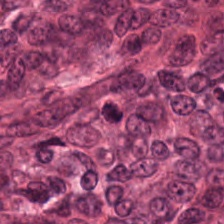

'<EOS>'

In [27]:
path = '../model_dev/Data_CMC_COADEL_224_1/val/Mitosis/'

display.display(display.Image(path + test_ids[400]))

caption_image(validation_vectors[2])